In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('seaborn')


/tmp/ipykernel_62567/2724801775.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
noisy_data = 'yes' # 'yes' or 'no'

In [3]:
log_runs_dir = '/home/beck/star-formation-ML/logs/eval/runs/'

# Listet den Inhalt des Predictions-Verzeichnisses auf
log_runs = os.listdir(log_runs_dir)

# Sortiert die Versionen nach dem Erstellungsdatum
sorted_runs = sorted(log_runs, key=lambda x: os.path.getmtime(os.path.join(log_runs_dir, x)))

# Die neueste Version ist die letzte in der sortierten Liste
aktuelle_version = sorted_runs[-1]
letzte_version = sorted_runs[-2]

version_95
version_96


In [ ]:
version = letzte_version 

In [ ]:
# load data

if noisy_data == 'yes':
    
    x_test = np.load('%s%s/x_test.npy' %(log_runs_dir, version))
    x_pred = np.load('%s%s/x_pred.npy' %(log_runs_dir, version))
    y_test = np.load('%s%s/y_test.npy' %(log_runs_dir, version))
    y_pred = np.load('%s%s/y_pred.npy' %(log_runs_dir, version))

    y_test_scaled  = np.load('%s%s/y_test_scaled.npy' %(log_runs_dir, version))
    y_pred_scaled  = np.load('%s%s/y_pred_scaled.npy' %(log_runs_dir, version))
    
    
else: 

    x_test = np.load('%s%s/x_test_no_noise.npy' %(log_runs_dir, version))
    x_pred = np.load('%s%s/x_pred_no_noise.npy' %(log_runs_dir, version))
    y_test = np.load('%s%s/y_test_no_noise.npy' %(log_runs_dir, version))
    y_pred = np.load('%s%s/y_pred_no_noise.npy' %(log_runs_dir, version))

    y_test_scaled  = np.load('%s%s/y_test_scaled_no_noise.npy' %(log_runs_dir, version))
    y_pred_scaled  = np.load('%s%s/y_pred_scaled_no_noise.npy' %(log_runs_dir, version))

## Extracting Parameters from the Predicted and Ground Truth Values

In [5]:
T_true_scaled = y_test_scaled[:, 0]
T_alpha_true_scaled = y_test_scaled[:, 1]
n_true_scaled = y_test_scaled[:, 2]
n_alpha_true_scaled = y_test_scaled[:, 3]
M_true_scaled = y_test_scaled[:, 4]

T_predicted_scaled = y_pred_scaled[:, 0]
T_alpha_predicted_scaled = y_pred_scaled[:, 1]
n_predicted_scaled = y_pred_scaled[:, 2]
n_alpha_predicted_scaled = y_pred_scaled[:, 3]
M_predicted_scaled = y_pred_scaled[:, 4]

T_true = y_test[:, 0]
T_alpha_true = y_test[:, 1]
n_true = y_test[:, 2]
n_alpha_true = y_test[:, 3]
M_true = y_test[:, 4]

T_predicted = y_pred[:, 0]
T_alpha_predicted = y_pred[:, 1]
n_predicted = y_pred[:, 2]
n_alpha_predicted = y_pred[:, 3]
M_predicted = y_pred[:, 4]

unique_values_T, unique_indices = np.unique(T_true, return_index=True)
unique_values_T_alpha, unique_indices = np.unique(T_alpha_true, return_index=True)
unique_values_n, unique_indices = np.unique(n_true, return_index=True)
unique_values_n_alpha, unique_indices = np.unique(n_alpha_true, return_index=True)
unique_values_T, unique_indices = np.unique(T_true, return_index=True)
unique_values_M, unique_indices = np.unique(M_true, return_index=True)

## Scatter Plots Predicted vs. Ground Truth Parameters

In [6]:
# Festlegen der gleichen Achsengrenzen
min_val_T = min(min(T_true), min(T_predicted))
max_val_T = max(max(T_true), max(T_predicted))
min_val_n = min(min(n_true), min(n_predicted))
max_val_n = max(max(n_true), max(n_predicted))
min_val_T_alpha = min(min(T_alpha_true), min(T_alpha_predicted))
max_val_T_alpha = max(max(T_alpha_true), max(T_alpha_predicted))
min_val_n_alpha = min(min(n_alpha_true), min(n_alpha_predicted))
max_val_n_alpha = max(max(n_alpha_true), max(n_alpha_predicted))
min_val_M = min(min(M_true), min(M_predicted))
max_val_M = max(max(M_true), max(M_predicted))

# Logarithmische Transformation der Daten
log_n_predicted = np.log10(n_predicted)
log_n_true = np.log10(n_true)
log_M_predicted = np.log10(M_predicted)
log_M_true = np.log10(M_true)

# Berechnung der Regressionsgerade
slope_T, intercept_T = np.polyfit(T_predicted, T_true, 1)
x_T = np.linspace(0, max_val_T+100, 100)
y_T = slope_T * x_T + intercept_T

slope_n, intercept_n = np.polyfit(log_n_predicted, log_n_true, 1)
x_n = np.linspace(0, max_val_n+10, 100)
y_n = slope_n * np.log10(x_n) + intercept_n

slope_T_alpha, intercept_T_alpha = np.polyfit(T_alpha_predicted, T_alpha_true, 1)
x_T_alpha = np.linspace(min_val_T_alpha-10, max_val_T_alpha+10, 100)
y_T_alpha = slope_T_alpha * x_T_alpha + intercept_T_alpha

slope_n_alpha, intercept_n_alpha = np.polyfit(n_alpha_predicted, n_alpha_true, 1)
x_n_alpha = np.linspace(min_val_n_alpha-10, max_val_n_alpha+10, 100)
y_n_alpha = slope_n_alpha * x_n_alpha + intercept_n_alpha

slope_M, intercept_M = np.polyfit(log_M_predicted, log_M_true, 1)
x_M = np.linspace(0, max_val_M+10, 100)
y_M = slope_M * np.log10(x_M) + intercept_M

/tmp/ipykernel_62567/1202863226.py:26: RuntimeWarning: divide by zero encountered in log10
  y_n = slope_n * np.log10(x_n) + intercept_n
/tmp/ipykernel_62567/1202863226.py:38: RuntimeWarning: divide by zero encountered in log10
  y_M = slope_M * np.log10(x_M) + intercept_M


## Violin Plots of Predicted and True Parameters

In [7]:
# Indizes aller Werte ermitteln
all_indices_T = np.arange(len(T_true))
all_indices_n = np.arange(len(n_true))
all_indices_T_alpha = np.arange(len(T_alpha_true))
all_indices_n_alpha = np.arange(len(n_alpha_true))
all_indices_M = np.arange(len(M_true))

# Array für eindeutige Werte erstellen
unique_values_T = np.array(unique_values_T)
unique_values_n = np.array(unique_values_n)
unique_values_T_alpha = np.array(unique_values_T_alpha)
unique_values_n_alpha = np.array(unique_values_n_alpha)
unique_values_M = np.array(unique_values_M)

# 2D-Array für Indizes erstellen
indices_array_T = np.empty((len(unique_values_T),), dtype=object)
indices_array_n = np.empty((len(np.log10(unique_values_n)),), dtype=object)
indices_array_T_alpha = np.empty((len(unique_values_T_alpha),), dtype=object)
indices_array_n_alpha = np.empty((len(unique_values_n_alpha),), dtype=object)
indices_array_M = np.empty((len(unique_values_M),), dtype=object)

# Indizes für jede eindeutige Temperatur speichern
for i, value in enumerate(unique_values_T):
    indices_T = all_indices_T[T_true == value]
    indices_array_T[i] = indices_T
    
for i, value in enumerate(np.log10(unique_values_n)):
    indices_n = all_indices_n[np.log10(n_true) == value]
    indices_array_n[i] = indices_n
    
for i, value in enumerate(unique_values_T_alpha):
    indices_T_alpha = all_indices_T_alpha[T_alpha_true == value]
    indices_array_T_alpha[i] = indices_T_alpha
    
for i, value in enumerate(unique_values_n_alpha):
    indices_n_alpha = all_indices_n_alpha[n_alpha_true == value]
    indices_array_n_alpha[i] = indices_n_alpha

for i, value in enumerate(np.log10(unique_values_M)):
    indices_M = all_indices_M[np.log10(M_true) == value]
    indices_array_M[i] = indices_M


# Kombiniere die Daten in einer Liste (nur die ersten 10 Datensätze)
data_T = [T_predicted[idx] for idx in indices_array_T[:10]]
data_n = [np.log10(n_predicted)[idx] for idx in indices_array_n[:10]]
data_T_alpha = [T_alpha_predicted[idx] for idx in indices_array_T_alpha[:10]]
data_n_alpha = [n_alpha_predicted[idx] for idx in indices_array_n_alpha[:10]]
data_M = [np.log10(M_predicted)[idx] for idx in indices_array_M[:10]]

# Lineare Regression berechnen
slope_T = (max(unique_values_T) - min(unique_values_T)) / (7 - 1)
intercept_T = unique_values_T[0] - slope_T * 1
x_T_violin = np.linspace(0, 10.5, 100)
y_T_violin = slope_T * x_T_violin + intercept_T

slope_n = (max(np.log10(unique_values_n)) - min(np.log10(unique_values_n))) / (7 - 1)
intercept_n = np.log10(unique_values_n)[0] - slope_n * 1
x_n_violin = np.linspace(0, 7.5, 100)
y_n_violin = slope_n * x_n_violin + intercept_n

slope_T_alpha = (max(unique_values_T_alpha) - min(unique_values_T_alpha)) / (7 - 1)
intercept_T_alpha = unique_values_T_alpha[0] - slope_T_alpha * 1
x_T_alpha_violin = np.linspace(0, 7.5, 100)
y_T_alpha_violin = slope_T_alpha * x_T_alpha_violin + intercept_T_alpha

slope_n_alpha = (max(unique_values_n_alpha) - min(unique_values_n_alpha)) / (7 - 1)
intercept_n_alpha = unique_values_n_alpha[0] - slope_n_alpha * 1
x_n_alpha_violin = np.linspace(0, 7.5, 100)
y_n_alpha_violin = slope_n_alpha * x_n_alpha_violin + intercept_n_alpha

slope_M = (max(np.log10(unique_values_M)) - min(np.log10(unique_values_M))) / (7 - 1)
intercept_M = np.log10(unique_values_M)[0] - slope_M * 1
x_M_violin = np.linspace(0, 7.5, 100)
y_M_violin = slope_M * x_M_violin + intercept_M

## Scatter Plots and violin plots together

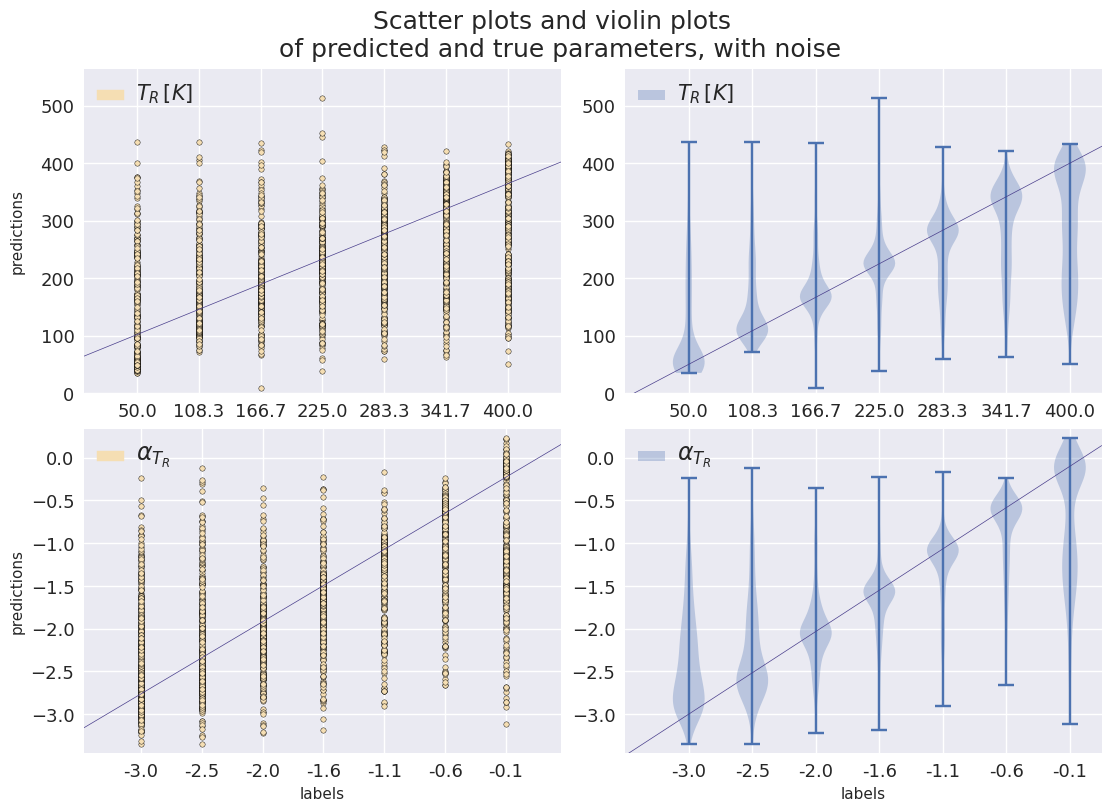

In [8]:
fig = plt.figure(layout="constrained", figsize=(11, 8))
gs = fig.add_gridspec(2, 2) #, hspace=0.5, wspace=0.2)

if noisy_data == 'yes':
    fig.suptitle('Scatter plots and violin plots \n of predicted and true parameters, with noise', fontsize = 18)
else:
    fig.suptitle('Scatter plots and violin plots \n of predicted and true parameters', fontsize = 18)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)

ax1.scatter(T_true, T_predicted, s=15, edgecolors = 'black', c = 'wheat')  # 'jet' als Farbskala, s=10 für kleinere Punkte
ax1.set_xlim(0, max(T_true)+50)
ax1.set_ylim(0, max(T_predicted)+50)
ax1.plot(x_T, y_T, color='darkslateblue', linewidth=0.5, label='Regression line')
ax1.set_ylabel('predictions')
ax1.set_xticks(unique_values_T)
patch1 = mpatches.Patch(color='wheat', label='$T_R \, [K]$')
legend1 = ax1.legend(handles=[patch1], loc='upper left')
legend1.get_texts()[0].set_fontsize(15)  # Increase the font size of the legend text

ax2.violinplot(data_T)
ax2.plot(x_T_violin, y_T_violin, color='darkslateblue', linewidth=0.5, label='Regression line')
ax2.set_xlim(0, 7.5)
ax2.set_xticks(np.arange(1, len(unique_values_T) + 1), ['{:.1f}'.format(value) for value in unique_values_T])
legend2 = ax2.legend(['$T_R \, [K]$'], loc='upper left')
legend2.get_texts()[0].set_fontsize(15)  # Increase the font size of the legend text

ax3.scatter(T_alpha_true, T_alpha_predicted, s=15, edgecolors = 'black', c = 'wheat')  # 'jet' als Farbskala, s=10 für kleinere Punkte
ax3.set_xlim(min_val_T_alpha-0.1, max_val_T_alpha+0.1)
ax3.set_ylim(min_val_T_alpha-0.1, max_val_T_alpha+0.1)
ax3.plot(x_T_alpha, y_T_alpha, color='darkslateblue', linewidth=0.5, label='Regression line')
ax3.set_xlabel('labels')
ax3.set_ylabel('predictions')
ax3.set_xticks(unique_values_T_alpha)
ax3.set_xticklabels(['%.1f' % value for value in unique_values_T_alpha])
patch3 = mpatches.Patch(color='wheat', label='$\\alpha_{{T_R}}$')
legend3 = ax3.legend(handles=[patch3], loc='upper left')
legend3.get_texts()[0].set_fontsize(17)  # Increase the font size of the legend text

ax4.violinplot(data_T_alpha)
ax4.plot(x_T_alpha_violin, y_T_alpha_violin, color='darkslateblue', linewidth=0.5, label='Regression line')
ax4.set_xlim(0, 7.5)
ax4.set_xticks(np.arange(1, len(unique_values_T_alpha) + 1), ['{:.1f}'.format(value) for value in unique_values_T_alpha])
ax4.set_xlabel('labels')
legend4 = ax4.legend(['$\\alpha_{{T_R}}$'], loc='upper left')
legend4.get_texts()[0].set_fontsize(17)  # Increase the font size of the legend text

fig.align_ylabels([ax1, ax3])

for ax in fig.get_axes():

    #ax.label_outer()
    ax.tick_params(axis='both', labelsize=13)  # Set the tick label size to 8

if noisy_data == 'yes':
    plt.savefig('./Predictions/%s/Analysis/Plots_T_noise.png' %version, dpi=500)
else:
    plt.savefig('./Predictions/%s/Analysis/Plots_T.png' %version, dpi=500)


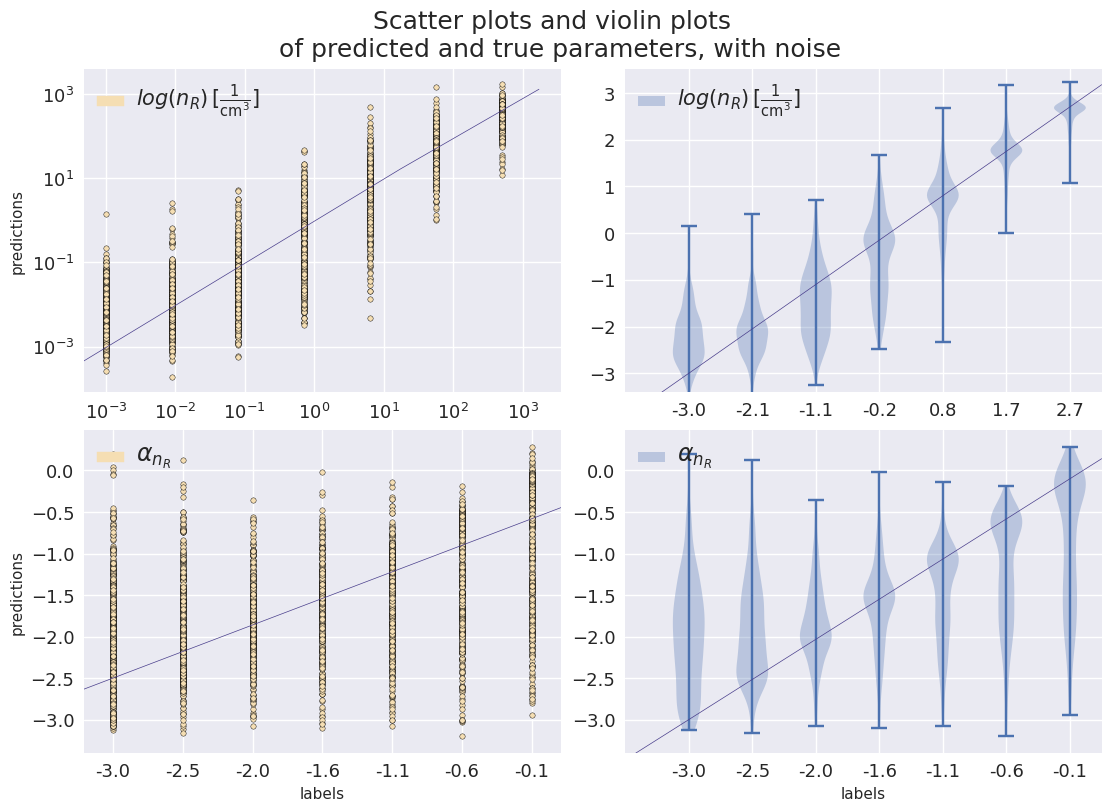

In [9]:
fig = plt.figure(layout="constrained", figsize=(11, 8))
gs = fig.add_gridspec(2, 2) #, hspace=0.5, wspace=0.2)

if noisy_data == 'yes':
    fig.suptitle('Scatter plots and violin plots \n of predicted and true parameters, with noise', fontsize = 18)
else:
    fig.suptitle('Scatter plots and violin plots \n of predicted and true parameters', fontsize = 18)
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)

ax1.scatter(n_true, n_predicted, s=15, edgecolors = 'black', c = 'wheat')  # 'jet' als Farbskala, s=10 für kleinere Punkte
#ax1.set_xlim(min_val_n, max_val_n)
#ax1.set_ylim(min_val_n, max_val_n)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(x_n, 10**y_n, color='darkslateblue', linewidth=0.5, label='Regression line')
ax1.set_ylabel('predictions')
patch1 = mpatches.Patch(color='wheat', label='$log(n_{{R}}) \, [\\frac{{1}}{{\mathrm{{cm}}^3}}]$')
legend1 = ax1.legend(handles=[patch1], loc='upper left')
legend1.get_texts()[0].set_fontsize(15)  # Increase the font size of the legend text

ax2.violinplot(data_n)
ax2.plot(x_n_violin, y_n_violin, color='darkslateblue', linewidth=0.5, label='Regression line')
ax2.set_xlim(0, 7.5)
ax2.set_ylim(-3.4, 3.5)
ax2.set_xticks(np.arange(1, len(unique_values_n) + 1), ['{:.1f}'.format(value) for value in np.log10(unique_values_n)])
legend2 = ax2.legend(['$log(n_{{R}}) \, [\\frac{{1}}{{\mathrm{{cm}}^3}}]$'], loc='upper left')
legend2.get_texts()[0].set_fontsize(15)  # Increase the font size of the legend text

ax3.scatter(n_alpha_true, n_alpha_predicted, s=15, edgecolors = 'black', c = 'wheat')
ax3.set_xlim(min(n_alpha_true)-0.2, max(n_alpha_true)+0.2)
ax3.set_ylim(min(n_alpha_predicted)-0.2, max(n_alpha_predicted)+0.2)
ax3.plot(x_n_alpha, y_n_alpha, color='darkslateblue', linewidth=0.5, label='Regression line')
ax3.set_xlabel('labels')
ax3.set_ylabel('predictions')
ax3.set_xticks(unique_values_n_alpha)
ax3.set_xticklabels(['%.1f' % value for value in unique_values_n_alpha])
patch3 = mpatches.Patch(color='wheat', label='$\\alpha_{{n_R}}$')
legend3 = ax3.legend(handles=[patch3], loc='upper left')
legend3.get_texts()[0].set_fontsize(17)  # Increase the font size of the legend text

ax4.violinplot(data_n_alpha)
ax4.plot(x_n_alpha_violin, y_n_alpha_violin, color='darkslateblue', linewidth=0.5, label='Regression line')
ax4.set_xlim(0, 7.5)
ax4.set_xticks(np.arange(1, len(unique_values_n_alpha) + 1), ['{:.1f}'.format(value) for value in unique_values_n_alpha])
ax4.set_xlabel('labels')
legend4 = ax4.legend(['$\\alpha_{{n_R}}$'], loc='upper left')
legend4.get_texts()[0].set_fontsize(17)  # Increase the font size of the legend text

fig.align_ylabels([ax1, ax3])

for ax in fig.get_axes():

    #ax.label_outer()
    ax.tick_params(axis='both', labelsize=13)  # Set the tick label size to 8

if noisy_data == 'yes':
    plt.savefig('./Predictions/%s/Analysis/Plots_n_noise.png' %version, dpi=500)
else:
    plt.savefig('./Predictions/%s/Analysis/Plots_n.png' %version, dpi=500)


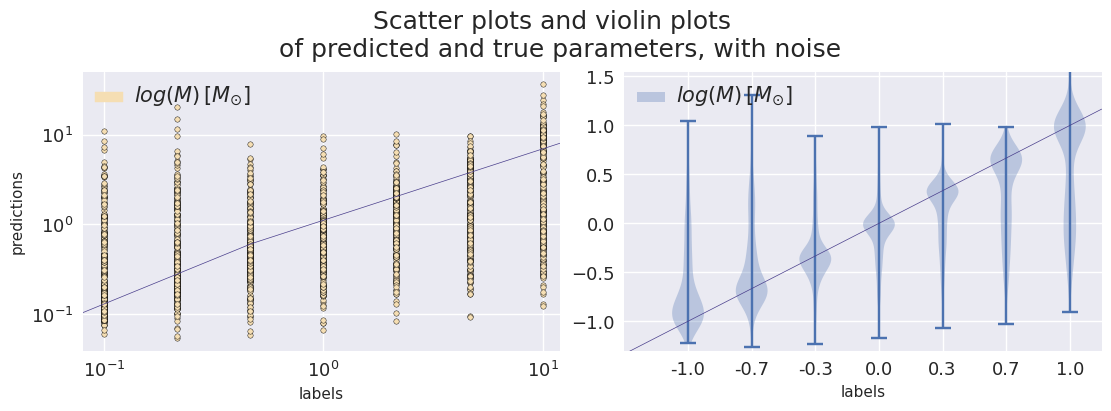

In [10]:
fig = plt.figure(layout="constrained", figsize=(11, 4))
gs = fig.add_gridspec(1, 2) #, hspace=0.5, wspace=0.2)

if noisy_data == 'yes':
    fig.suptitle('Scatter plots and violin plots \n of predicted and true parameters, with noise', fontsize = 18)
else:
    fig.suptitle('Scatter plots and violin plots \n of predicted and true parameters', fontsize = 18)
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1.scatter(M_true, M_predicted, s=15, edgecolors = 'black', c = 'wheat') 
ax1.plot(x_M, 10**y_M, color='darkslateblue', linewidth=0.5, label='Regression line')
ax1.set_ylabel('predictions')
ax1.set_xlim(0.08, 12)
ax1.set_xticks(unique_values_M)
ax1.set_xticklabels(['%.1f' % value for value in np.log10(unique_values_M)])
patch1 = mpatches.Patch(color='wheat', label='$log(M) \, [M_{{\odot}}]$')
legend1 = ax1.legend(handles=[patch1], loc='upper left')
legend1.get_texts()[0].set_fontsize(15)  # Increase the font size of the legend text
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('labels')


ax2.violinplot(data_M)
ax2.set_ylim(-1.3, 1.55)
ax2.plot(x_M_violin, y_M_violin, color='darkslateblue', linewidth=0.5, label='Regression line')
ax2.set_xlim(0, 7.5)
ax2.set_xticks(np.arange(1, len(unique_values_M) + 1), ['{:.1f}'.format(value) for value in np.log10(unique_values_M)])
legend2 = ax2.legend(['$log(M) \, [M_{{\odot}}]$'], loc='upper left')
legend2.get_texts()[0].set_fontsize(15)  # Increase the font size of the legend text
ax2.set_xlabel('labels')

fig.align_ylabels([ax1, ax2])

for ax in fig.get_axes():

    #ax.label_outer()
    ax.tick_params(axis='both', labelsize=13)  # Set the tick label size to 8
    
if noisy_data == 'yes':
    plt.savefig('./Predictions/%s/Analysis/Plots_M_noise.png' %version, dpi=500)
else:
    plt.savefig('./Predictions/%s/Analysis/Plots_M.png' %version, dpi=500)